<a href="https://colab.research.google.com/github/FGalvao77/Aplica-o-do-PySpark-e-MLlib/blob/main/Aplica%C3%A7%C3%A3o_do_PySpark_e_MLlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicação do PySpark e MLlib** 

---



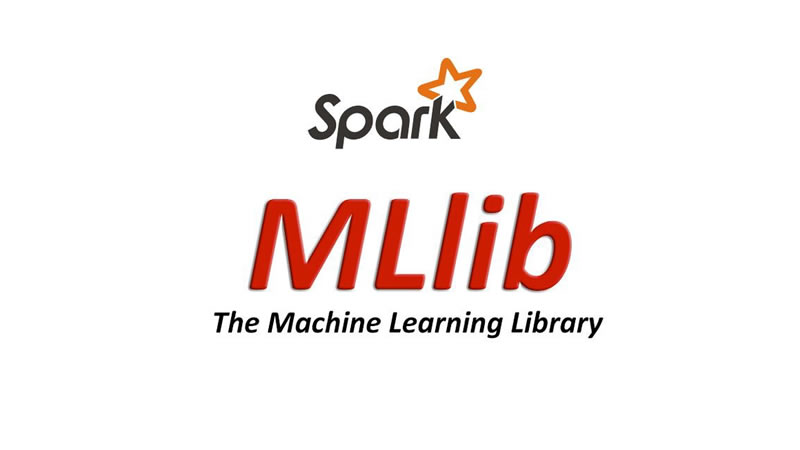

- https://spark.apache.org/docs/latest/ml-guide.html

Utilizando o ambiente do `Google Colab`, vamos explorar a **API** do spark para _Python_, o `Pyspark`, e da biblioteca de _Machine Learning_, `MLlib`, para realizar a análise exploratória de um conjunto de dados e fazer uma _Regressão Linear_.
 

## **Instalando o `PySpark`, suas dependências e configurando as variáveis de ambiente**

In [1]:
# instalando o pyspark
!pip install pyspark

In [2]:
# instalando as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q pyspark

In [3]:
# configurando as variáveis de ambiente
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop2.7'

# tornando o pyspark "importável"
import findspark
# findspark.init()
findspark.init('spark-3.1.2-bin-hadoop2.7')

## **Machine Learning em Big Data com PySpark**

**Iniciando uma SparkSession**

De início é necessário criar uma sessão Spark, onde é possível configurar os nós do cluster, bem como a memória alocada para cada um deles.

In [4]:
# importando a biblioteca para iniciar uma sessão spark
from pyspark.sql import SparkSession

# iniciando uma sessão spark - usamos quando se trabalha com dataframes no spark
spark = SparkSession.builder\
        .master('local[*]')\
        .appName('Linear Regression Model with PySpark/MLlib')\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# visualizando a sessão criada e sua configurações 
spark

**Iniciando o desenvolvimento com Spark**

Após a sessão spark criada e definidas as suas configurações, a próxima etapa é importar o conjunto de dados, para atividade prática, iremos utilizar o arquivo [`“Salary_Data.csv”`](https://raw.githubusercontent.com/Arpit0220/Salary_Data.csv/main/Salary_Data.csv), contendo dados de determinados funcionários, com os seus salários e anos de experiência em determinada função.

In [5]:
# realizando o download do https para arquivo local
!wget --quiet --show-progress https://raw.githubusercontent.com/Arpit0220/Salary_Data.csv/main/Salary_Data.csv

# carregando os dados
df_salary = spark.read.csv('/content/Salary_Data.csv', inferSchema=True, header=True)

Salary_Data.csv     100%[===================>]     454  --.-KB/s    in 0s      


**Análise exploratória dos dados**

In [6]:
# visualizando o tipo do objeto da variável "df_salary"
type (df_salary)

pyspark.sql.dataframe.DataFrame

In [7]:
# com a função ".printSchema()" visualizando informações sobre os tipos de dados de cada coluna
df_salary.printSchema()

root
 |-- YearsExperience: double (nullable = true)
 |-- Salary: double (nullable = true)



In [8]:
# tipos de dados no pyspark.sql

# importando a biblioteca 
from pyspark.sql import types 

# visualizando os tipos de dados
for t in ['BinaryType', 'BooleanType', 'ByteType', 'DateType', 
          'DecimalType', 'DoubleType', 'FloatType', 'IntegerType', 
           'LongType', 'ShortType', 'StringType', 'TimestampType']:
    print(f"{t}: {getattr(types, t)().simpleString()}")

BinaryType: binary
BooleanType: boolean
ByteType: tinyint
DateType: date
DecimalType: decimal(10,0)
DoubleType: double
FloatType: float
IntegerType: int
LongType: bigint
ShortType: smallint
StringType: string
TimestampType: timestamp


In [9]:
# nome das colunas
df_salary.columns

['YearsExperience', 'Salary']

In [10]:
# visualizando as 5 primeiras linhas
df_salary.take(5)

[Row(YearsExperience=1.1, Salary=39343.0),
 Row(YearsExperience=1.3, Salary=46205.0),
 Row(YearsExperience=1.5, Salary=37731.0),
 Row(YearsExperience=2.0, Salary=43525.0),
 Row(YearsExperience=2.2, Salary=39891.0)]

In [11]:
# visualizando o conjunto de dados em formato de tabela
df_salary.show()    # por padrão é exibido as 20 primeiras linhas

+---------------+-------+
|YearsExperience| Salary|
+---------------+-------+
|            1.1|39343.0|
|            1.3|46205.0|
|            1.5|37731.0|
|            2.0|43525.0|
|            2.2|39891.0|
|            2.9|56642.0|
|            3.0|60150.0|
|            3.2|54445.0|
|            3.2|64445.0|
|            3.7|57189.0|
|            3.9|63218.0|
|            4.0|55794.0|
|            4.0|56957.0|
|            4.1|57081.0|
|            4.5|61111.0|
|            4.9|67938.0|
|            5.1|66029.0|
|            5.3|83088.0|
|            5.9|81363.0|
|            6.0|93940.0|
+---------------+-------+
only showing top 20 rows



In [12]:
# visualizando a quantidade de linhas com a função ".count()"
df_salary.count()

30

In [13]:
# instanciando os dados em uma nova variável e gerando um RDD (Resilient Distributed Dataset)
salaryRDD = df_salary
salaryRDD.cache()   # definindo que, todo processamento dos dados será executado na memória cache

DataFrame[YearsExperience: double, Salary: double]

In [14]:
# visualizando dados estatísticos
salaryRDD.describe().show()

+-------+------------------+------------------+
|summary|   YearsExperience|            Salary|
+-------+------------------+------------------+
|  count|                30|                30|
|   mean|5.3133333333333335|           76003.0|
| stddev| 2.837888157662718|27414.429784582302|
|    min|               1.1|           37731.0|
|    max|              10.5|          122391.0|
+-------+------------------+------------------+



In [15]:
# importando a biblioteca
from pyspark.sql.types import *

# função para converter o tipo de dados das colunas DataFrame
def convertColumn(df, names, newType):
    for name in names: 
        df = df.withColumn(name, df[name].cast(newType))
    return df 

# atribuindo todos os nomes das colunas a `columns`
columns = ['YearsExperience', 'Salary']

# convertendo as colunas `df` em` FloatType() `
df = convertColumn(salaryRDD, columns, FloatType())

In [16]:
# visualizando se o tipo de dado foi alterado para "float"
df.printSchema()

root
 |-- YearsExperience: float (nullable = true)
 |-- Salary: float (nullable = true)



In [17]:
# visualizando apenas uma coluna com o método ".select()" 
# e juntamente com ".show(5)" - 5 linhas
df.select('Salary').show(5)

+-------+
| Salary|
+-------+
|39343.0|
|46205.0|
|37731.0|
|43525.0|
|39891.0|
+-------+
only showing top 5 rows



In [18]:
# com a função ".groupBy()" iremos agrupar e contabilizar os valores dos salários
# e ordenando pela mesma coluna ("Salary")
df.groupBy('Salary').count().sort('Salary', 
                                  ascending=False).show()

+--------+-----+
|  Salary|count|
+--------+-----+
|122391.0|    1|
|121872.0|    1|
|116969.0|    1|
|113812.0|    1|
|112635.0|    1|
|109431.0|    1|
|105582.0|    1|
|101302.0|    1|
| 98273.0|    1|
| 93940.0|    1|
| 91738.0|    1|
| 83088.0|    1|
| 81363.0|    1|
| 67938.0|    1|
| 66029.0|    1|
| 64445.0|    1|
| 63218.0|    1|
| 61111.0|    1|
| 60150.0|    1|
| 57189.0|    1|
+--------+-----+
only showing top 20 rows



**Aplicando Regressão Linear**

`Regressão Linear` é um problema de _Aprendizado Supervisionado_, ou seja, o algoritmo necessita do **‘ground truth’**, os rótulos das entradas, de modo que ele possa comparar com sua saída e calcular alguma métrica de erro, como `Erro Quadrático Médio` (do inglês, _Mean Squared Error, MSE_), bastante empregado em problemas de regressão.

In [19]:
# importando a biblioteca
from pyspark.ml.linalg import DenseVector   # para criação de vetores

In [21]:
# definindo os dados de entrada como "input_data"
# realizando um "map" e juntamente com a função "lambda" percorremos as colunas e linhas
# transformando os dados em vetores
input_data = df.rdd.map(lambda x: (x[0], 
                                   DenseVector(x[1: ])))

In [22]:
# substituindo o "df" por um novo dataframe
df = spark.createDataFrame(input_data, 
                           ['label', 'features'])

In [24]:
# visualizando o novo df
df.show()   # e visualizando as transformações realizadas

+------------------+---------+
|             label| features|
+------------------+---------+
| 1.100000023841858|[39343.0]|
|1.2999999523162842|[46205.0]|
|               1.5|[37731.0]|
|               2.0|[43525.0]|
| 2.200000047683716|[39891.0]|
|2.9000000953674316|[56642.0]|
|               3.0|[60150.0]|
| 3.200000047683716|[54445.0]|
| 3.200000047683716|[64445.0]|
| 3.700000047683716|[57189.0]|
|3.9000000953674316|[63218.0]|
|               4.0|[55794.0]|
|               4.0|[56957.0]|
| 4.099999904632568|[57081.0]|
|               4.5|[61111.0]|
| 4.900000095367432|[67938.0]|
| 5.099999904632568|[66029.0]|
| 5.300000190734863|[83088.0]|
| 5.900000095367432|[81363.0]|
|               6.0|[93940.0]|
+------------------+---------+
only showing top 20 rows



Agora, precisamos deixar os dados na mesma escala. Isso é de extrema importância já que o algoritmo de `Regressão linear` realiza os cálculos utilizando a distância euclidiana, ou seja, realiza operações de distância entre pontos no plano cartesiano.

Para essa necessidade, usaremos o método de normalização conhecido como `StantardScaler`, onde subtrai-se a média do valor x definido, e divide-se pela diferença (_xmax – xmin_). Desta forma, os dados estarão distribuidos na mesma escala - entre 0 e 1.

Realizamos o `fit` e o `transform` em cima do **df**, desta forma a variável `scaled_df` contém nosso **label** e as **features**, e todas `features` devidamente escaladas.

In [25]:
# importando a biblioteca para escalar os dados
from pyspark.ml.feature import StandardScaler

In [26]:
# instanciando o modelo para escalar os dados
std_scaler = StandardScaler(inputCol='features', 
                            outputCol='features_scaled')

In [27]:
# treinando o dados com o modelo
scaled = std_scaler.fit(df)

In [30]:
# transformando os dados em um novo df
scaled_df = scaled.transform(df)

In [32]:
# visualizando o resultado
scaled_df.show(2)

+------------------+---------+--------------------+
|             label| features|     features_scaled|
+------------------+---------+--------------------+
| 1.100000023841858|[39343.0]|[1.4351201286749449]|
|1.2999999523162842|[46205.0]|[1.6854262650389098]|
+------------------+---------+--------------------+
only showing top 2 rows



In [33]:
# visualizando o resultado com a função ".take()"
scaled_df.take(2)   # somente duas linhas

[Row(label=1.100000023841858, features=DenseVector([39343.0]), features_scaled=DenseVector([1.4351])),
 Row(label=1.2999999523162842, features=DenseVector([46205.0]), features_scaled=DenseVector([1.6854]))]

A partir daqui é onde começamos aplicação de Machine Learning, mas como primeira etapa, é necessário dividir nosso conjunto de dados em treino e teste. - para isso, dividiremos de forma aleatória com tamanhos 75% para treino e 25% para teste, com seed 1234.

Essa etapa é primordial para o sucesso da nosso estudo, já que o principal objetivo do algoritmo de Machine Learning é que ele tenha capacidade de generalização, ou seja, para os dados não aplicados no treinamento ela consiga realizar predições assertivas e por consequência métricas aceitáveis. Desta forma, o workflow desejado seria que o algoritmo fosse treinado em dados conhecidos (conjunto de treino), e atingisse boas métricas para o conjunto de testes (dados nunca antes vistos pelo algoritmo).

O elemento seed 1234 insere um elemento de randomização padrão, ou seja, a divisão de treino e testes será feita de maneira aleatória, porém, sempre terá o mesmo resultado para o mesmo seed. Isso é importante para reprodução de resultados.

In [34]:
# realizando a divisão dos dados em treino e teste
train_data, test_data = scaled_df.randomSplit([0.75, 0.25], 
                                              seed=1234)

In [36]:
# visualizando a quantidade de dados das variáveis de treino e teste
train_data.count(), test_data.count()

(22, 8)

Agora importaremos o módulo `LinearRegression`, e instanciaremos o objeto como **lr**, é em seguida, definiremos os parâmetros `labelCol=’label’` sendo estes os labels, ou rótulos do nosso problema de aprendizado supervisionado. O parâmetro `maxIter` é o número máximo de iterações que o algoritmo deve considerar para convergir.

Depois de criado o modelo com _LinearRegression_, aplicaremos o método `fit`, para realizar o treinamento do algoritmo com os dados de **train_data** - conjunto de treino.

In [37]:
# importando a biblioteca
from pyspark.ml.regression import LinearRegression

In [38]:
# instanciando o modelo de regressão linear
lr = LinearRegression(labelCol='label', 
                      maxIter=10)

In [39]:
# realizando o treinamento do modelo com os dados de treinamento
linearModel = lr.fit(train_data)

Criaremos a variável `predicted`, que é a predição do algoritmo para o conjunto de testes (**test_data**).

É realizada a extração de predictions da variável predicted, e também a extração dos labels, de modo que se possa compará-los lado a lado na variável `predictionAndLabel`.

Essa variável contém ambas as predições e os rótulos verdadeiros.

In [40]:
# gerando as predições
predicted = linearModel.transform(test_data)

In [41]:
# extraindo as predições e os rótulos corretos
predictions = predicted.select('prediction').rdd.map(lambda x: x[0])
labels = predicted.select('label').rdd.map(lambda x: x[0])

In [42]:
# compactando as predições e os rótulos em uma lista
predictionAndLabel = predictions.zip(labels).collect()

In [43]:
# imprimindo as 5 primeiras instâncias da variável "predictionAndLabel"
predictionAndLabel[:5]

[(2.4088336346189774, 1.2999999523162842),
 (1.8115026389699527, 2.200000047683716),
 (7.334685753949579, 7.099999904632568),
 (8.390279553355947, 8.699999809265137),
 (8.026147940708958, 9.0)]

Pode-se extrair os coeficientes da equação da reta, com a seguinte fórmula:
    
    y = a0.x + a1

Onde coefficients é o valor de `a0`, e intercept é o valor de `a1`.


In [44]:
# coeficientes do modelo
linearModel.coefficients

DenseVector([0.0001])

In [45]:
# interceptor do modelo
linearModel.intercept

-1.962353988751815

In [46]:
# extraindo o Erro Quadrático Médio, em inglês MSE, representado pela raiz quadrada deste valor(RMSE)
linearModel.summary.rootMeanSquaredError

0.5604487702361474

In [47]:
# métrica de avaliação do modelo, extrai-se o R2, ou Coeficiente de Determinação, 
# uma métrica estatística de proximidade de pontos e reta sobreposta
linearModel.summary.r2

0.9347632503845014

In [48]:
# encerrando a sessão spark
spark.stop()